In [39]:
import pandas as pd
import numpy as np
import os, sys
from scipy import stats

In [40]:
df1 = pd.DataFrame({'name':['John', 'George', 'Ringo'],
                  'color':['Blue', 'Blue', 'Purple']})
df2 = pd.DataFrame({'name':['Paul', 'George', 'Ringo'],
                   'carcolor':['Red', 'Blue', np.nan]},
                  index=[3, 1, 2])

In [41]:
pd.concat([df1, df2])

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,NaN
2,Ringo,Purple,NaN
3,Paul,NaN,Red
1,George,NaN,Blue
2,Ringo,NaN,NaN


In [42]:
pd.concat([df1, df2], verify_integrity=True)

ValueError: Indexes have overlapping values: Index([1, 2], dtype='int64')

In [ ]:
pd.concat([df1, df2], ignore_index=True)

In [ ]:
pd.concat([df1, df2], axis=1)

In [43]:
df1.merge(df2) # inner join

,name,color,carcolor
0,George,Blue,Blue
1,Ringo,Purple,NaN


In [44]:
df1.merge(df2, how='outer')

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,Blue
2,Ringo,Purple,NaN
3,Paul,NaN,Red


In [45]:
df1.merge(df2, how='left')

,name,color,carcolor
0,John,Blue,NaN
1,George,Blue,Blue
2,Ringo,Purple,NaN


In [46]:
df1.merge(df2,how='right')

,name,color,carcolor
0,Paul,NaN,Red
1,George,Blue,Blue
2,Ringo,Purple,NaN


In [47]:
df1.merge(df2, how='right', left_on='color',
          right_on='carcolor')

,name_x,color,name_y,carcolor
0,NaN,NaN,Paul,Red
1,John,Blue,George,Blue
2,George,Blue,George,Blue
3,NaN,NaN,Ringo,NaN


In [48]:
df1.merge(df2, how='outer', indicator=True)

,name,color,carcolor,_merge
0,John,Blue,NaN,left_only
1,George,Blue,Blue,both
2,Ringo,Purple,NaN,both
3,Paul,NaN,Red,right_only


In [49]:
df1.merge(df2, how='right', left_on='color', right_on='carcolor', validate='1:m')

MergeError: Merge keys are not unique in left dataset; not a one-to-many merge

In [53]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/dirtydevil.txt'

In [54]:
df= pd.read_csv(url, skiprows=lambda num: num <34or num ==35, sep='\t')

/tmp/ipykernel_42/2002841362.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(url, skiprows=lambda num: num <34or num ==35, sep='\t')


In [55]:
def to_us_mountain_time(df_, time_col, tz_col):
    return(df_
          .assign(**{tz_col: df_[tz_col].replace('MDT', 
                                                'MST7MDT')})
          .groupby(tz_col)
          [time_col]
          .transform(lambda s: pd.to_datetime(s)
                    .dt.tz_localize(s.name, ambiguous=True)
                    .dt.tz_convert('US/Mountain'))
          )

In [56]:
def tweak_river(df_):
    return(df_
          .assign(datetime=to_us_mountain_time(df_, 'datetime', 'tz_cd'))
          .rename(columns={'144166_00060': 'cfs',
                          '144167_00065': 'gage_height'})
          )

In [57]:
dd = tweak_river(df)

In [58]:
dd

,agency_cd,site_no,datetime,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd
0,USGS,9333500,2001-05-07 01:00:00-06:00,MDT,71.00,A:[91],NaN,NaN
1,USGS,9333500,2001-05-07 01:15:00-06:00,MDT,71.00,A:[91],NaN,NaN
2,USGS,9333500,2001-05-07 01:30:00-06:00,MDT,71.00,A:[91],NaN,NaN
3,USGS,9333500,2001-05-07 01:45:00-06:00,MDT,70.00,A:[91],NaN,NaN
4,USGS,9333500,2001-05-07 02:00:00-06:00,MDT,70.00,A:[91],NaN,NaN
...,...,...,...,...,...,...,...,...
539300,USGS,9333500,2020-09-28 08:30:00-06:00,MDT,9.53,P,6.16,P
539301,USGS,9333500,2020-09-28 08:45:00-06:00,MDT,9.20,P,6.15,P
539302,USGS,9333500,2020-09-28 09:00:00-06:00,MDT,9.20,P,6.15,P
539303,USGS,9333500,2020-09-28 09:15:00-06:00,MDT,9.20,P,6.15,P


In [59]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/hanksville.csv'

In [60]:
temp_df = pd.read_csv(url)

In [61]:
def tweak_temp(df_):
    return (df_
           .assign(DATE=pd.to_datetime(df_.DATE)
                  .dt.tz_localize('US/Mountain', ambiguous=False))
           .loc[:,['DATE', 'PRCP', 'TMIN', 'TMAX', 'TOBS']]
           )

In [62]:
temp_df = tweak_temp(temp_df)

In [63]:
temp_df

,DATE,PRCP,TMIN,TMAX,TOBS
0,2000-01-01 00:00:00-07:00,0.02,21.0,43.0,28.0
1,2000-01-02 00:00:00-07:00,0.03,24.0,39.0,24.0
2,2000-01-03 00:00:00-07:00,0.00,7.0,39.0,18.0
3,2000-01-04 00:00:00-07:00,0.00,5.0,39.0,25.0
4,2000-01-05 00:00:00-07:00,0.00,10.0,44.0,22.0
...,...,...,...,...,...
6843,2020-09-20 00:00:00-06:00,0.00,46.0,92.0,83.0
6844,2020-09-21 00:00:00-06:00,0.00,47.0,92.0,84.0
6845,2020-09-22 00:00:00-06:00,0.00,54.0,84.0,77.0
6846,2020-09-23 00:00:00-06:00,0.00,47.0,91.0,87.0


In [64]:
(dd
    .merge(temp_df, left_on='datetime', right_on='DATE')
)

,agency_cd,site_no,datetime,tz_cd,cfs,144166_00060_cd,gage_height,144167_00065_cd,DATE,PRCP,TMIN,TMAX,TOBS
0,USGS,9333500,2001-05-08 00:00:00-06:00,MDT,75.00,A:[91],NaN,NaN,2001-05-08 00:00:00-06:00,0.0,43.0,85.0,58.0
1,USGS,9333500,2001-05-09 00:00:00-06:00,MDT,64.00,A:[91],NaN,NaN,2001-05-09 00:00:00-06:00,0.0,36.0,92.0,64.0
2,USGS,9333500,2001-05-10 00:00:00-06:00,MDT,54.00,A:[91],NaN,NaN,2001-05-10 00:00:00-06:00,0.0,50.0,92.0,67.0
3,USGS,9333500,2001-05-11 00:00:00-06:00,MDT,56.00,A:[91],NaN,NaN,2001-05-11 00:00:00-06:00,0.0,46.0,87.0,60.0
4,USGS,9333500,2001-05-12 00:00:00-06:00,MDT,49.00,A:[91],NaN,NaN,2001-05-12 00:00:00-06:00,0.0,45.0,93.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,USGS,9333500,2020-09-20 00:00:00-06:00,MDT,6.04,P,6.04,P,2020-09-20 00:00:00-06:00,0.0,46.0,92.0,83.0
4969,USGS,9333500,2020-09-21 00:00:00-06:00,MDT,6.83,P,6.07,P,2020-09-21 00:00:00-06:00,0.0,47.0,92.0,84.0
4970,USGS,9333500,2020-09-22 00:00:00-06:00,MDT,6.83,P,6.07,P,2020-09-22 00:00:00-06:00,0.0,54.0,84.0,77.0
4971,USGS,9333500,2020-09-23 00:00:00-06:00,MDT,7.68,P,6.10,P,2020-09-23 00:00:00-06:00,0.0,47.0,91.0,87.0


In [65]:
(dd
    .groupby(pd.Grouper(key='datetime', freq='D'))
    .median()
    .merge(temp_df, left_index=True, right_on='DATE')
)

TypeError: could not convert string to float: 'USGS'

In [66]:
(dd
    .groupby(pd.Grouper(key='datetime', freq='D'))
    .median()
    .merge(temp_df, left_index=True, right_on='DATE',
          how='inner', validate='1:1')
)

TypeError: could not convert string to float: 'USGS'

In [68]:
import matplotlib.pyplot as plt

TypeError: could not convert string to float: 'USGS'

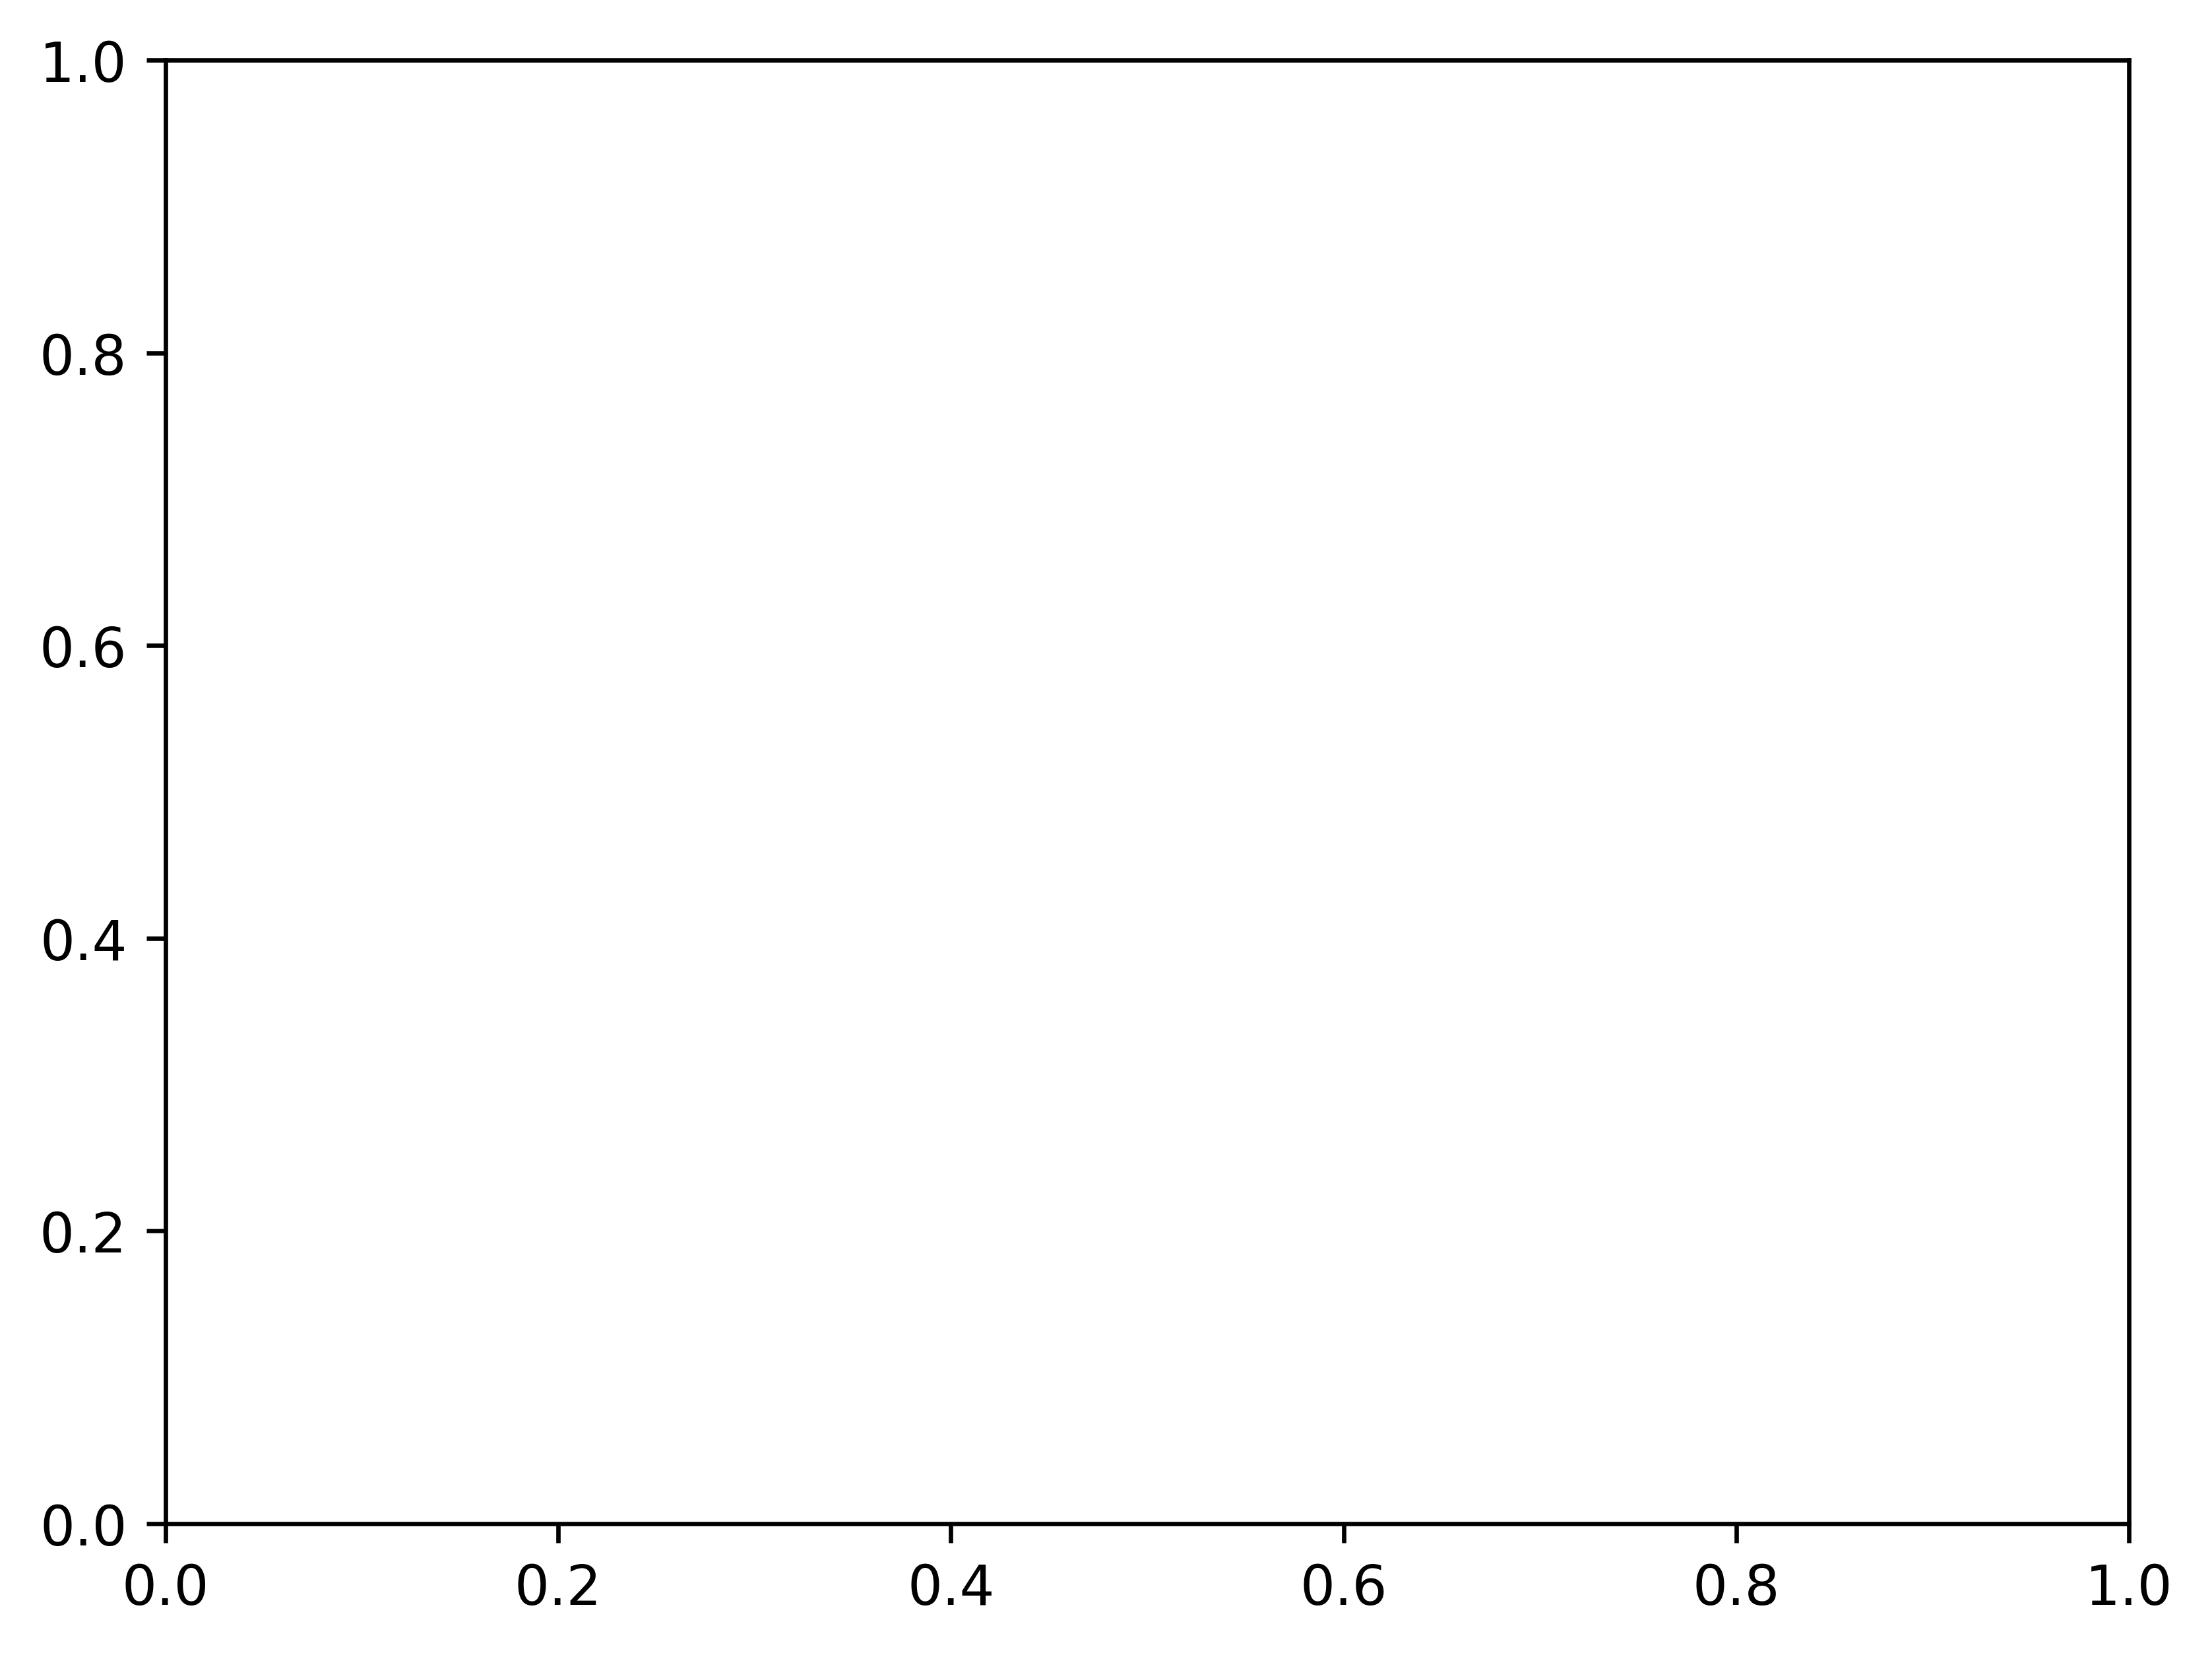

In [69]:
fig, ax = plt.subplots(dpi=600)
(dd
    .groupby(pd.Grouper(key='datetime', freq='D'))
    .median()
    .merge(temp_df, left_index=True, right_on='DATE', how='inner', validate='1:1')
    .set_index('DATE')
    .loc['2014':,['cfs', 'gage_height', 'PRCP', 'TOBS']]
    .interpolate()
    .rolling(15)
    .mean()
    .plot(subplots=True, figsize=(10,8), ax=ax)
)
fig.subtitle('Dirty Devil Metrics (15 day average)')

TypeError: could not convert string to float: 'USGS'

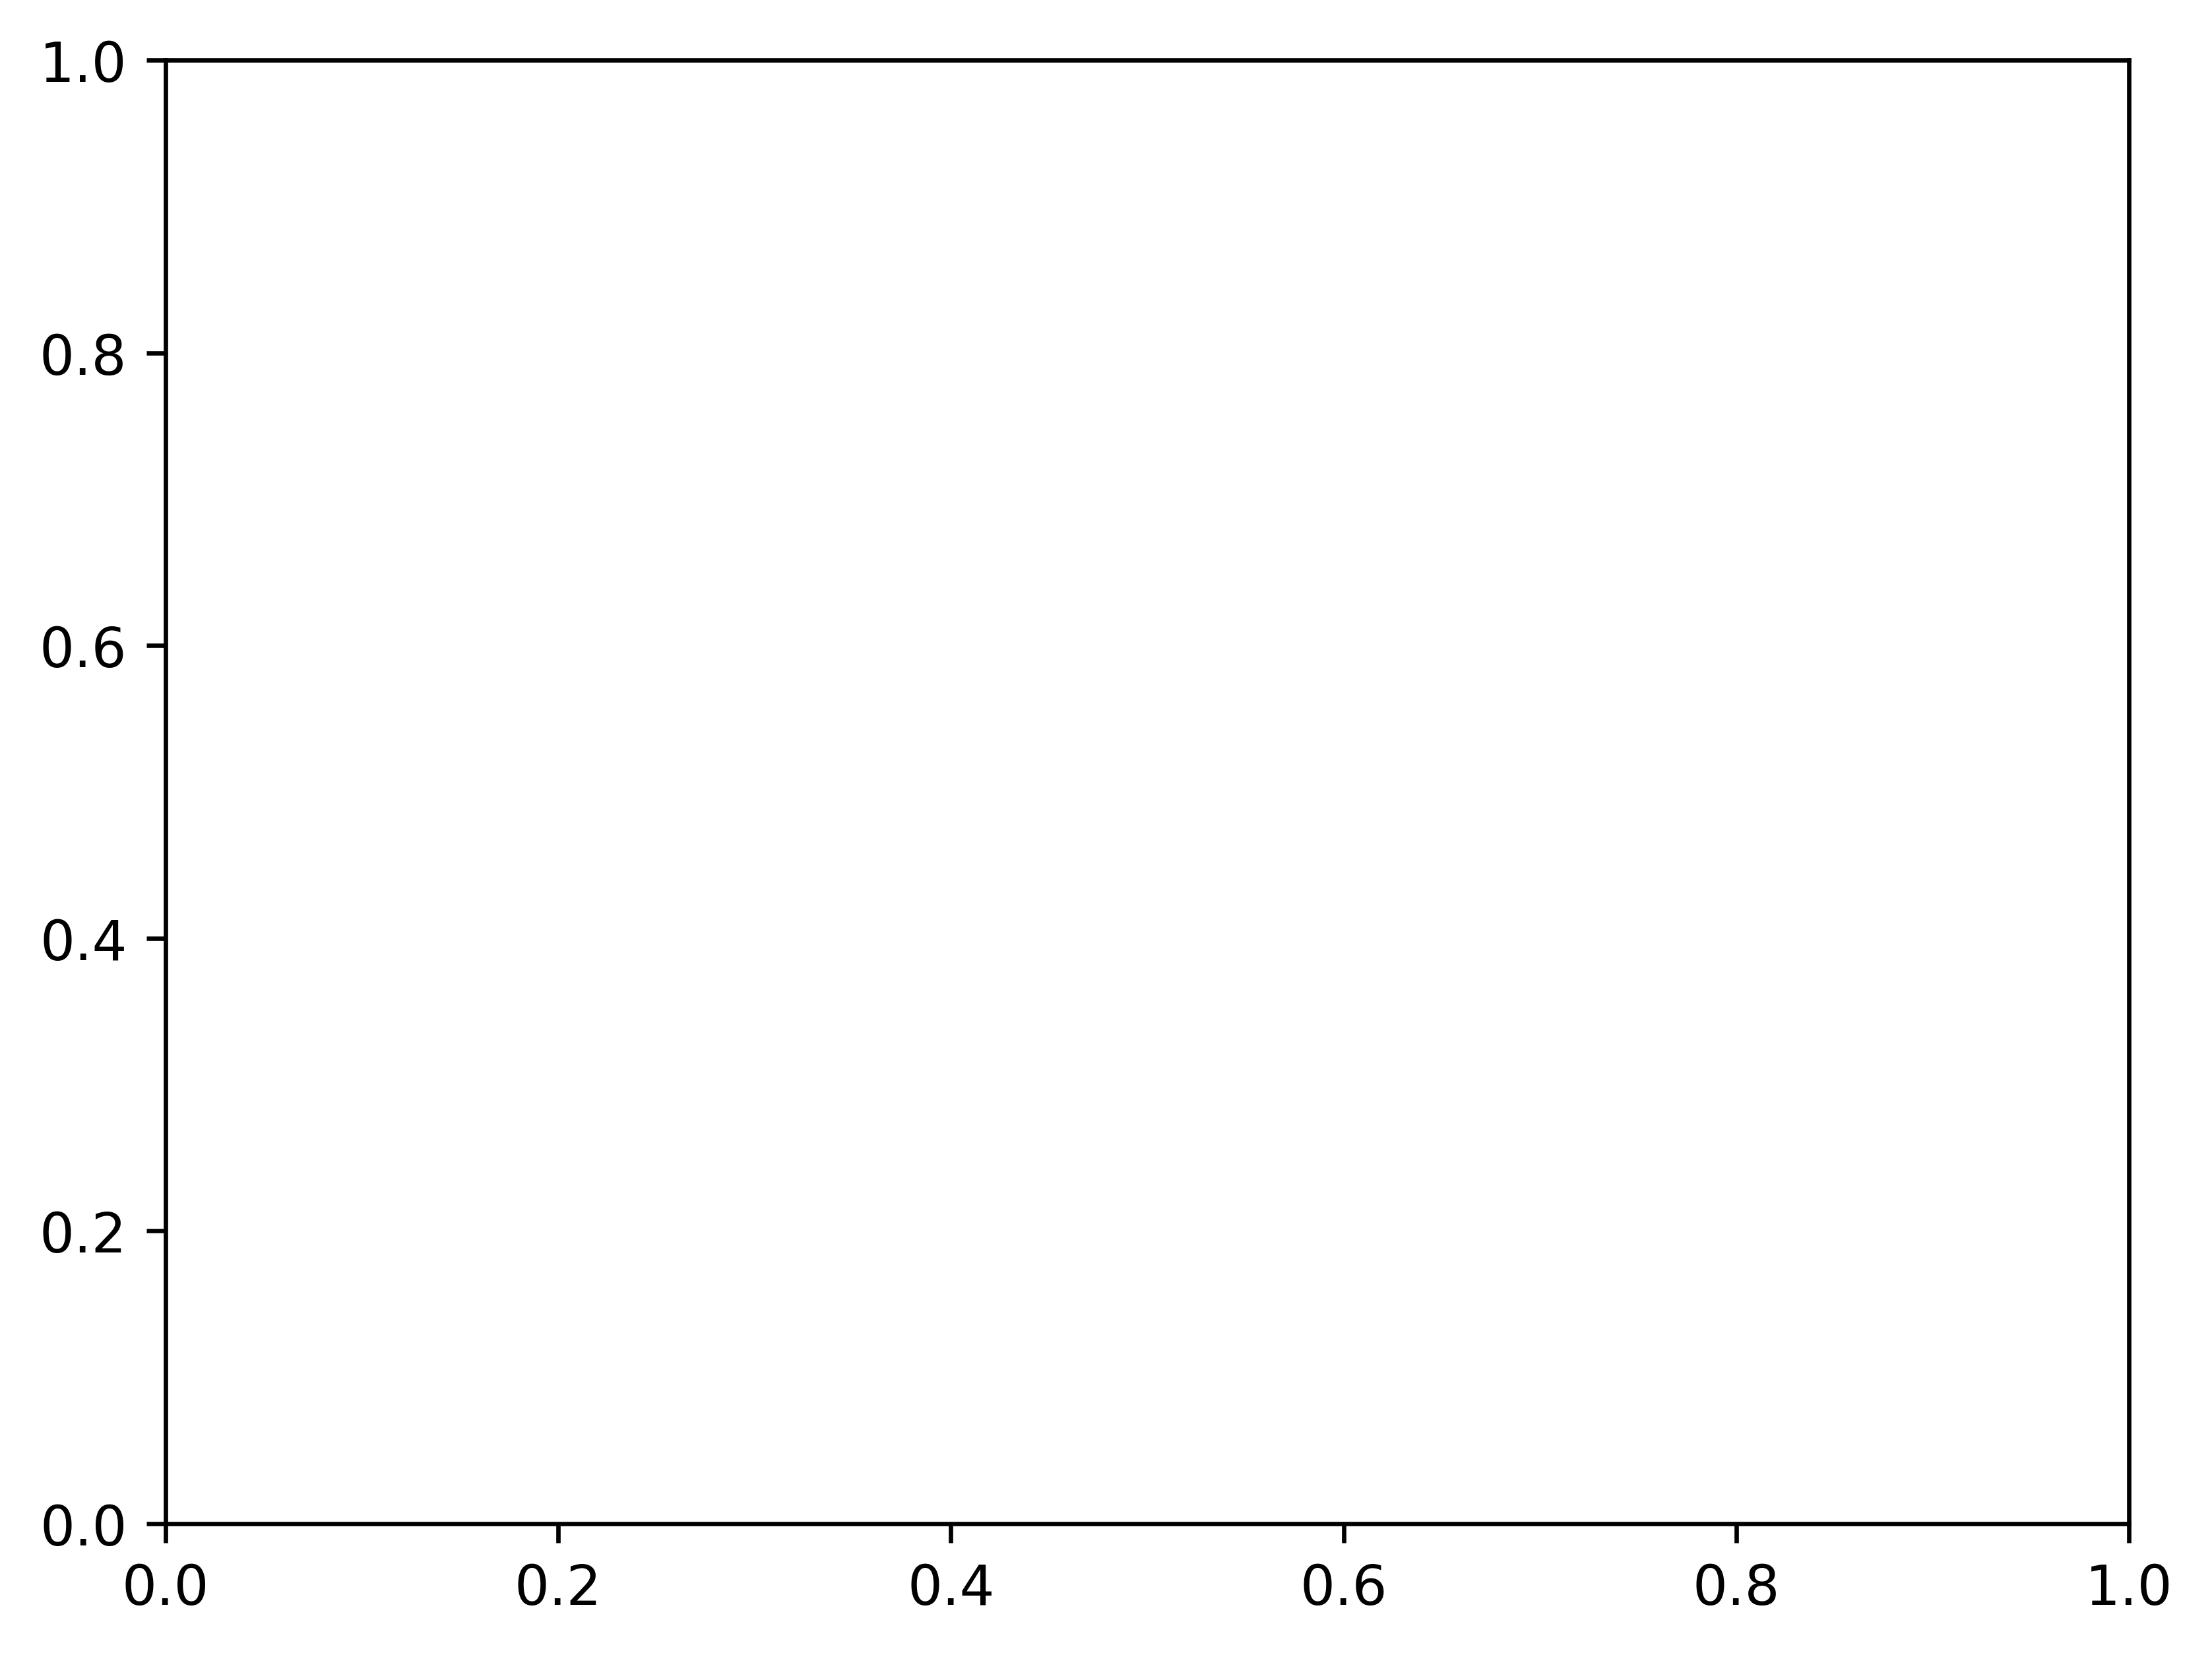

In [70]:
fig, ax = plt.subplots(dpi=600)
dd2 = (dd
      .groupby(pd.Grouper(key='datetime', freq='D'))
      .median()
      .merge(temp_df, left_index=True, right_on='DATE',
            how='inner', validate='1:1')
      .query('cfs < 400')
      )

In [71]:
(dd2
    .plot.scatter(x='cfs', y='TOBS', c=dd2.DATE.dt.month,
                 ax=ax, cmap='hsv', alpha=.5)
)

NameError: name 'dd2' is not defined

In [72]:
ax.set_title('Observation Temperager (TOBS)'
            'vs River FLow (cubic feet per sec)\nColored by Month')

Text(0.5, 1.0, 'Observation Temperager (TOBS)vs River FLow (cubic feet per sec)\nColored by Month')